# 数据分析入门

在这个 Notebook 中，我们将学习使用 pandas 和 numpy 进行基础数据分析。

## 1. 导入必要的库

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 设置中文字体（解决中文显示问题）
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False   # 用来正常显示负号

print('库导入成功！')

库导入成功！


## 2. 创建数据

In [2]:
# 创建示例数据
data = {
    '姓名': ['张三', '李四', '王五', '赵六', '钱七', '孙八', '周九', '吴十'],
    '年龄': [25, 30, 35, 28, 32, 27, 29, 31],
    '城市': ['北京', '上海', '广州', '深圳', '杭州', '南京', '成都', '武汉'],
    '薪资': [8000, 12000, 15000, 11000, 13000, 9000, 10000, 14000],
    '部门': ['技术', '销售', '技术', '市场', '技术', '销售', '市场', '技术']
}

# 创建 DataFrame
df = pd.DataFrame(data)
print('数据创建成功！')
print(f'数据形状：{df.shape}')  # (行数, 列数)
df

数据创建成功！
数据形状：(8, 5)


,姓名,年龄,城市,薪资,部门
0,张三,25,北京,8000,技术
1,李四,30,上海,12000,销售
2,王五,35,广州,15000,技术
3,赵六,28,深圳,11000,市场
4,钱七,32,杭州,13000,技术
5,孙八,27,南京,9000,销售
6,周九,29,成都,10000,市场
7,吴十,31,武汉,14000,技术


## 3. 数据探索

In [3]:
# 查看数据基本信息
print('=== 数据基本信息 ===')
print(f'数据形状：{df.shape}')
print(f'列名：{list(df.columns)}')
print(f'数据类型：')
print(df.dtypes)

=== 数据基本信息 ===
数据形状：(8, 5)
列名：['姓名', '年龄', '城市', '薪资', '部门']
数据类型：
姓名    object
年龄     int64
城市    object
薪资     int64
部门    object
dtype: object


In [4]:
# 查看前几行和后几行
print('=== 前3行数据 ===')
print(df.head(3))

print('=== 后3行数据 ===')
print(df.tail(3))

=== 前3行数据 ===
   姓名  年龄  城市     薪资  部门
0  张三  25  北京   8000  技术
1  李四  30  上海  12000  销售
2  王五  35  广州  15000  技术
=== 后3行数据 ===
   姓名  年龄  城市     薪资  部门
5  孙八  27  南京   9000  销售
6  周九  29  成都  10000  市场
7  吴十  31  武汉  14000  技术


In [5]:
# 描述性统计
print('=== 数值列的描述性统计 ===')
df.describe()

=== 数值列的描述性统计 ===


,年龄,薪资
count,8.000000,8.000000
mean,29.625000,11500.000000
std,3.113909,2449.489743
min,25.000000,8000.000000
25%,27.750000,9750.000000
50%,29.500000,11500.000000
75%,31.250000,13250.000000
max,35.000000,15000.000000


## 4. 数据选择和过滤

In [8]:
# 选择单列
print('=== 选择姓名列 ===')
print(df['姓名'])

# 选择多列
print('=== 选择姓名和薪资列 ===')
print(df[['姓名', '薪资']])

=== 选择姓名列 ===
0    张三
1    李四
2    王五
3    赵六
4    钱七
5    孙八
6    周九
7    吴十
Name: 姓名, dtype: object
=== 选择姓名和薪资列 ===
   姓名     薪资
0  张三   8000
1  李四  12000
2  王五  15000
3  赵六  11000
4  钱七  13000
5  孙八   9000
6  周九  10000
7  吴十  14000


In [9]:
# 条件过滤
print('=== 薪资大于10000的员工 ===')
high_salary = df[df['薪资'] > 10000]
print(high_salary)

print('=== 技术部门的员工 ===')
tech_dept = df[df['部门'] == '技术']
print(tech_dept[['姓名', '薪资', '部门']])

=== 薪资大于10000的员工 ===
   姓名  年龄  城市     薪资  部门
1  李四  30  上海  12000  销售
2  王五  35  广州  15000  技术
3  赵六  28  深圳  11000  市场
4  钱七  32  杭州  13000  技术
7  吴十  31  武汉  14000  技术
=== 技术部门的员工 ===
   姓名     薪资  部门
0  张三   8000  技术
2  王五  15000  技术
4  钱七  13000  技术
7  吴十  14000  技术


In [10]:
# 多条件过滤
print('=== 年龄大于28且薪资大于10000的员工 ===')
condition = (df['年龄'] > 28) & (df['薪资'] > 10000)
result = df[condition]
print(result[['姓名', '年龄', '薪资']])

=== 年龄大于28且薪资大于10000的员工 ===
   姓名  年龄     薪资
1  李四  30  12000
2  王五  35  15000
4  钱七  32  13000
7  吴十  31  14000


## 5. 数据分组和聚合

In [11]:
# 按部门分组统计
print('=== 按部门分组统计 ===')
dept_stats = df.groupby('部门').agg({
    '薪资': ['mean', 'max', 'min', 'count'],
    '年龄': 'mean'
})

print(dept_stats)

# 简化版本
print('=== 各部门平均薪资 ===')
avg_salary_by_dept = df.groupby('部门')['薪资'].mean()
print(avg_salary_by_dept)

=== 按部门分组统计 ===
         薪资                         年龄
       mean    max    min count   mean
部门                                    
市场  10500.0  11000  10000     2  28.50
技术  12500.0  15000   8000     4  30.75
销售  10500.0  12000   9000     2  28.50
=== 各部门平均薪资 ===
部门
市场    10500.0
技术    12500.0
销售    10500.0
Name: 薪资, dtype: float64


In [12]:
# 按城市分组
print('=== 各城市员工数量 ===')
city_count = df['城市'].value_counts()
print(city_count)

print('=== 各城市平均薪资 ===')
city_salary = df.groupby('城市')['薪资'].mean().sort_values(ascending=False)
print(city_salary)

=== 各城市员工数量 ===
城市
北京    1
上海    1
广州    1
深圳    1
杭州    1
南京    1
成都    1
武汉    1
Name: count, dtype: int64
=== 各城市平均薪资 ===
城市
广州    15000.0
武汉    14000.0
杭州    13000.0
上海    12000.0
深圳    11000.0
成都    10000.0
南京     9000.0
北京     8000.0
Name: 薪资, dtype: float64


## 6. 数据可视化基础

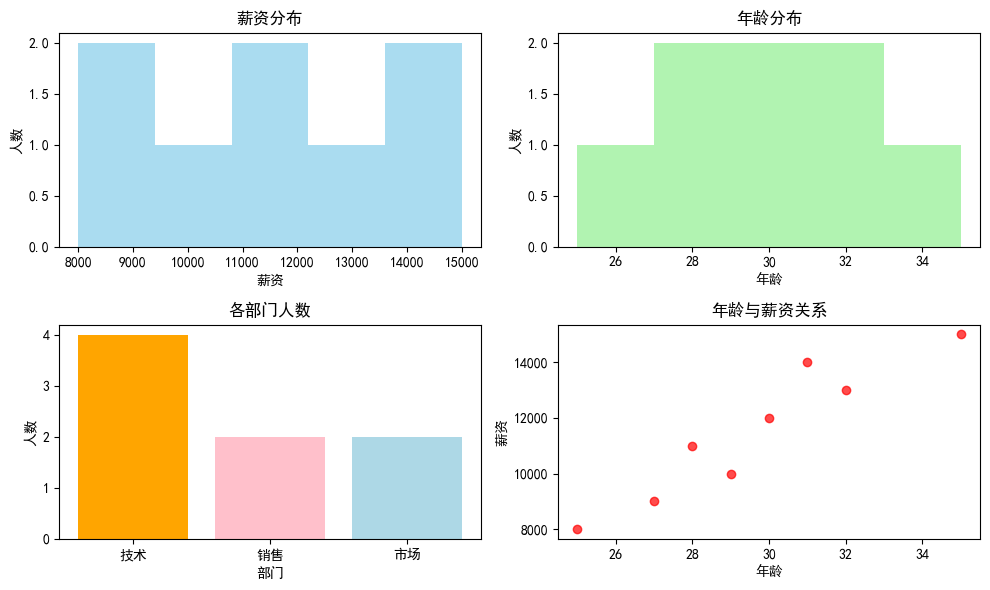

In [13]:
# 薪资分布直方图
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.hist(df['薪资'], bins=5, alpha=0.7, color='skyblue')
plt.title('薪资分布')
plt.xlabel('薪资')
plt.ylabel('人数')

# 年龄分布
plt.subplot(2, 2, 2)
plt.hist(df['年龄'], bins=5, alpha=0.7, color='lightgreen')
plt.title('年龄分布')
plt.xlabel('年龄')
plt.ylabel('人数')

# 部门人数
plt.subplot(2, 2, 3)
dept_counts = df['部门'].value_counts()
plt.bar(dept_counts.index, dept_counts.values, color=['orange', 'pink', 'lightblue'])
plt.title('各部门人数')
plt.xlabel('部门')
plt.ylabel('人数')

# 薪资散点图
plt.subplot(2, 2, 4)
plt.scatter(df['年龄'], df['薪资'], alpha=0.7, color='red')
plt.title('年龄与薪资关系')
plt.xlabel('年龄')
plt.ylabel('薪资')

plt.tight_layout()
plt.show()

## 7. 数据处理操作

In [14]:
# 添加新列
df_copy = df.copy()  # 创建副本避免修改原数据

# 计算薪资等级
def salary_level(salary):
    if salary >= 13000:
        return '高薪'
    elif salary >= 10000:
        return '中薪'
    else:
        return '低薪'

df_copy['薪资等级'] = df_copy['薪资'].apply(salary_level)

# 计算年薪
df_copy['年薪'] = df_copy['薪资'] * 12

print('=== 添加新列后的数据 ===')
print(df_copy[['姓名', '薪资', '薪资等级', '年薪']])

=== 添加新列后的数据 ===
   姓名     薪资 薪资等级      年薪
0  张三   8000   低薪   96000
1  李四  12000   中薪  144000
2  王五  15000   高薪  180000
3  赵六  11000   中薪  132000
4  钱七  13000   高薪  156000
5  孙八   9000   低薪  108000
6  周九  10000   中薪  120000
7  吴十  14000   高薪  168000


In [15]:
# 数据排序
print('=== 按薪资降序排列 ===')
sorted_by_salary = df.sort_values('薪资', ascending=False)
print(sorted_by_salary[['姓名', '薪资', '部门']])

print('=== 按年龄升序，薪资降序排列 ===')
sorted_multi = df.sort_values(['年龄', '薪资'], ascending=[True, False])
print(sorted_multi[['姓名', '年龄', '薪资']])

=== 按薪资降序排列 ===
   姓名     薪资  部门
2  王五  15000  技术
7  吴十  14000  技术
4  钱七  13000  技术
1  李四  12000  销售
3  赵六  11000  市场
6  周九  10000  市场
5  孙八   9000  销售
0  张三   8000  技术
=== 按年龄升序，薪资降序排列 ===
   姓名  年龄     薪资
0  张三  25   8000
5  孙八  27   9000
3  赵六  28  11000
6  周九  29  10000
1  李四  30  12000
7  吴十  31  14000
4  钱七  32  13000
2  王五  35  15000


## 8. 数据透视表

In [16]:
# 创建数据透视表
print('=== 部门薪资统计透视表 ===')
pivot_table = df.pivot_table(
    values='薪资',
    index='部门',
    aggfunc=['mean', 'max', 'min', 'count']
)

print(pivot_table)

=== 部门薪资统计透视表 ===
       mean    max    min count
         薪资     薪资     薪资    薪资
部门                             
市场  10500.0  11000  10000     2
技术  12500.0  15000   8000     4
销售  10500.0  12000   9000     2


## 9. 实践练习

In [17]:
# 练习：分析数据并回答问题
print('=== 数据分析报告 ===')
print(f'1. 总员工数：{len(df)}人')
print(f'2. 平均薪资：{df["薪资"].mean():.0f}元')
print(f'3. 最高薪资：{df["薪资"].max()}元')
print(f'4. 最低薪资：{df["薪资"].min()}元')
print(f'5. 平均年龄：{df["年龄"].mean():.1f}岁')

print('6. 各部门情况：')
for dept in df['部门'].unique():
    dept_data = df[df['部门'] == dept]
    avg_salary = dept_data['薪资'].mean()
    count = len(dept_data)
    print(f'   {dept}部：{count}人，平均薪资{avg_salary:.0f}元')

print('7. 薪资最高的员工：')
top_earner = df[df['薪资'] == df['薪资'].max()]
print(f'   {top_earner.iloc[0]["姓名"]}，薪资{top_earner.iloc[0]["薪资"]}元')

=== 数据分析报告 ===
1. 总员工数：8人
2. 平均薪资：11500元
3. 最高薪资：15000元
4. 最低薪资：8000元
5. 平均年龄：29.6岁
6. 各部门情况：
   技术部：4人，平均薪资12500元
   销售部：2人，平均薪资10500元
   市场部：2人，平均薪资10500元
7. 薪资最高的员工：
   王五，薪资15000元


In [20]:
# 保存数据到文件
df.to_csv('员工数据.csv', index=False, encoding='utf-8-sig')
print('数据已保存到 员工数据.csv')

# 从文件读取数据
df_loaded = pd.read_csv('员工数据.csv', encoding='utf-8-sig')
print('数据已从文件加载')
print(df_loaded)

print('数据保存和加载示例（已注释，可以取消注释运行）')

数据已保存到 员工数据.csv
数据已从文件加载
   姓名  年龄  城市     薪资  部门
0  张三  25  北京   8000  技术
1  李四  30  上海  12000  销售
2  王五  35  广州  15000  技术
3  赵六  28  深圳  11000  市场
4  钱七  32  杭州  13000  技术
5  孙八  27  南京   9000  销售
6  周九  29  成都  10000  市场
7  吴十  31  武汉  14000  技术
数据保存和加载示例（已注释，可以取消注释运行）


## 总结

在这个 Notebook 中，我们学习了：

1. **pandas 基础**：DataFrame 创建和基本操作
2. **数据探索**：查看数据形状、类型、统计信息
3. **数据选择**：列选择、条件过滤
4. **数据分组**：groupby 操作和聚合函数
5. **数据可视化**：使用 matplotlib 创建图表
6. **数据处理**：添加列、排序、数据透视表
7. **实践应用**：综合分析和报告生成

接下来可以学习：
- `04_可视化示例.ipynb` - 更多数据可视化技巧
- 更高级的数据分析技术